In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.path import Path
# from matplotlib.patches import PathPatch
# from astropy import wcs
from astropy.io import fits
# from matplotlib.mlab import rec2csv

# import emcee
# import corner

# from astropy.io import ascii
import _pickle as cPickle

In [2]:
import matplotlib as mpl

In [3]:
def median_interval(data, alpha=0.32):
    """
    Median including Bayesian credible interval.

    Parameters
    ----------
    data  : posterior samples
    alpha : 1 - confidence interval

    Returns
    -------
    [med,[lo, hi]] : median, lower, and upper percentiles
    
    """
    q = [100*alpha/2., 50, 100*(1-alpha/2.)]
    lo,med,hi = np.percentile(data,q)
    return [med,[lo,hi]]

In [4]:
# psc2e = cPickle.load( open( "psc2mcmc2d_exp.p", "rb" ) )
# psc2p = cPickle.load( open( "psc2mcmc2d_plum.p", "rb" ) )

peg3e = cPickle.load( open( "peg3mcmc3d_exp14.p", "rb" ) )
peg3p = cPickle.load( open( "peg3mcmc3d_plum4.p", "rb" ) )

# peg3e = cPickle.load( open( "psc2mcmc2d_exp.p", "rb" ) )
# peg3p = cPickle.load( open( "psc2mcmc2d_plum.p", "rb" ) )

In [5]:
# psc2cat = np.genfromtxt('psc2xyGood.dat',names=True)
peg3cat = np.genfromtxt('peg3xyGood.dat',names=True)

# peg3cat = np.genfromtxt('psc2xyGood.dat',names=True)

In [6]:
# psc2x = psc2cat['xgood']
# psc2y = psc2cat['ygood']
peg3x = peg3cat['xgood']
peg3y = peg3cat['ygood']

# peg3x = peg3cat['xgood']
# peg3y = peg3cat['ygood']

In [7]:
# rich_p2e,[rich_min_p2e,rich_max_p2e] = median_interval(psc2e[:,0])
# x_p2e,[xmin_p2e,xmax_p2e] = median_interval(psc2e[:,1])
# y_p2e,[ymin_p2e,ymax_p2e] = median_interval(psc2e[:,2])
# psc2e_ext_fit,[psc2e_ext_min,psc2e_ext_max] = median_interval(psc2e[:,3])
# psc2e_ell_fit,[psc2e_ell_min,psc2e_ell_max] = median_interval(psc2e[:,4])
# psc2e_pa_fit,[psc2e_pa_min,psc2e_pa_max] = median_interval(psc2e[:,5])
# psc2e_bg_fit,[psc2e_bg_min,psc2e_bg_max] = median_interval(psc2e[:,6])


In [8]:
# rich_p2p,[rich_min_p2p,rich_max_p2p] = median_interval(psc2p[:,0])
# x_p2p,[xmin_p2p,xmax_p2p] = median_interval(psc2p[:,1])
# y_p2p,[ymin_p2p,ymax_p2p] = median_interval(psc2p[:,2])
# psc2p_ext_fit,[psc2p_ext_min,psc2p_ext_max] = median_interval(psc2p[:,3])
# psc2p_ell_fit,[psc2p_ell_min,psc2p_ell_max] = median_interval(psc2p[:,4])
# psc2p_pa_fit,[psc2p_pa_min,psc2p_pa_max] = median_interval(psc2p[:,5])
# psc2p_bg_fit,[psc2p_bg_min,psc2p_bg_max] = median_interval(psc2p[:,6])

In [9]:
rich_p3e,[rich_min_p3e,rich_max_p3e] = median_interval(peg3e[:,0])
x_p3e,[xmin_p3e,xmax_p3e] = median_interval(peg3e[:,1])
y_p3e,[ymin_p3e,ymax_p3e] = median_interval(peg3e[:,2])
peg3e_ext_fit,[peg3e_ext_min,peg3e_ext_max] = median_interval(peg3e[:,3])
peg3e_ell_fit,[peg3e_ell_min,peg3e_ell_max] = median_interval(peg3e[:,4])
peg3e_pa_fit,[peg3e_pa_min,peg3e_pa_max] = median_interval(peg3e[:,5])
peg3e_bg_fit,[peg3e_bg_min,peg3e_bg_max] = median_interval(peg3e[:,6])

In [10]:
peg3e_ext_fit

2712.90325410953

In [11]:
rich_p3p,[rich_min_p3p,rich_max_p3p] = median_interval(peg3p[:,0])
x_p3p,[xmin_p3p,xmax_p3p] = median_interval(peg3p[:,1])
y_p3p,[ymin_p3p,ymax_p3p] = median_interval(peg3p[:,2])
peg3p_ext_fit,[peg3p_ext_min,peg3p_ext_max] = median_interval(peg3p[:,3])
peg3p_ell_fit,[peg3p_ell_min,peg3p_ell_max] = median_interval(peg3p[:,4])
peg3p_pa_fit,[peg3p_pa_min,peg3p_pa_max] = median_interval(peg3p[:,5])
peg3p_bg_fit,[peg3p_bg_min,peg3p_bg_max] = median_interval(peg3p[:,6])

In [12]:
def returnPDFp(rich,x0,y0,gal_ext_pix,gal_ell,gal_pa,xbin,ybin):
    
    costh = np.cos(-1 * np.deg2rad(gal_pa))
    sinth = np.sin(-1 * np.deg2rad(gal_pa))

    dx = xbin - x0
    dy = ybin - y0

    r1 = (dx * costh - dy * sinth) / (1 - gal_ell)
    r2 = (dx * sinth + dy * costh)

    radius = np.sqrt(r1**2 + r2**2)
    
    r_h = gal_ext_pix
    norm = r_h**2 / (np.pi * (1-gal_ell))
    # half light radius squared / (pi * 1-ell)
    pdf = norm/((radius**2 + r_h**2)**2)
    
    arr = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.,1.1,1.2,1.3,1.4,1.5])
    r_annuli = (arr + 0.05) * r_h

    # .05r_h, .15r_h
    area_annuli = np.pi * ( (r_annuli + (0.05*r_h))**2 - (r_annuli - (0.05*r_h))**2) * (1-gal_ell)
    
    pix_per_arcsec=20
    area_arcmin = area_annuli/(pix_per_arcsec*60)**2
    
#     aa = area_annuli # trying. to do everything in pixel space right now
    aa = area_arcmin
    
    return pdf, radius, aa


In [13]:
def returnPDFe(rich,x0,y0,gal_ext_pix,gal_ell,gal_pa,xbin,ybin):
    
    costh = np.cos(-1 * np.deg2rad(gal_pa))
    sinth = np.sin(-1 * np.deg2rad(gal_pa))

    dx = xbin - x0
    dy = ybin - y0

    r1 = (dx * costh - dy * sinth) / (1 - gal_ell)
    r2 = (dx * sinth + dy * costh)

    radius = np.sqrt(r1**2 + r2**2)
    
    # Exponential radius (re = rh/1.68)
    r_h = gal_ext_pix
    r_e = gal_ext_pix/1.68 
    #Normalization (integrates to unity over all space) [stars/pix^2)
    norm = 1./(2*np.pi*r_e**2 * (1-gal_ell) )

    # Exponential PDF
    pdf = norm * np.exp(-radius/r_e)
    arr = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.,1.1,1.2,1.3,1.4,1.5])
    r_annuli = (arr + 0.05) * r_h

    # .05r_h, .15r_h
    area_annuli = np.pi * ( (r_annuli + (0.05*r_h))**2 - (r_annuli - (0.05*r_h))**2) * (1-gal_ell)
    
    pix_per_arcsec=20
    area_arcmin = area_annuli/(pix_per_arcsec*60)**2
    
#     aa = area_annuli # trying. to do everything in pixel space right now
    aa = area_arcmin
    
    return pdf, radius, aa


In [14]:
xdel = 30.
ydel = 30.
pixarea = xdel*ydel  # pixel area in each bin

In [15]:
bk = (20**2) * (60**2) / 30**2

In [16]:
xbin0 = np.ones((180,1))  # (fltarr(80)+1)
xbin1 = np.ones((1,180))  
xbin1[0] = np.arange(0,180,1)
xbin2 = xbin1 * 30 + 0.5*(30)  # 67.5 pixels wide
xbin_p2 = np.matmul(xbin0,xbin2)
ybin_p2 = xbin_p2.T

# creating x and y arrays to represent the bins across the image

# Exponential Portion Peg3

In [17]:
pdf_p3e, rad_p3e, aa_p3e = returnPDFe(rich_p3e,x_p3e,y_p3e,peg3e_ext_fit,
                             peg3e_ell_fit,peg3e_pa_fit,xbin_p2,ybin_p2)

In [18]:
model_counts_p3e = rich_p3e*pdf_p3e*pixarea

In [19]:
rad_p3e=rad_p3e.flatten()
r_h = peg3e_ext_fit
# r_h = 1200
r1_p3e = np.where(rad_p3e < (0.1 * r_h))[0]
r2_p3e = np.where((rad_p3e < (0.2 * r_h)) & (rad_p3e >= (0.1 * r_h)))[0]
r3_p3e = np.where((rad_p3e < (0.3 * r_h)) & (rad_p3e >= (0.2 * r_h)))[0]
r4_p3e = np.where((rad_p3e < (0.4 * r_h)) & (rad_p3e >= (0.3 * r_h)))[0]
r5_p3e = np.where((rad_p3e < (0.5 * r_h)) & (rad_p3e >= (0.4 * r_h)))[0]
r6_p3e = np.where((rad_p3e < (0.6 * r_h)) & (rad_p3e >= (0.5 * r_h)))[0]
r7_p3e = np.where((rad_p3e < (0.7 * r_h)) & (rad_p3e >= (0.6 * r_h)))[0]
r8_p3e = np.where((rad_p3e < (0.8 * r_h)) & (rad_p3e >= (0.7 * r_h)))[0]
r9_p3e = np.where((rad_p3e < (0.9 * r_h)) & (rad_p3e >= (0.8 * r_h)))[0]
r10_p3e = np.where((rad_p3e < r_h) & (rad_p3e >= (0.9 * r_h)))[0]
r11_p3e = np.where((rad_p3e < (1.1 * r_h)) & (rad_p3e >= (1.0 * r_h)))[0]
r12_p3e = np.where((rad_p3e < (1.2 * r_h)) & (rad_p3e >= (1.1 * r_h)))[0]
r13_p3e = np.where((rad_p3e < (1.3 * r_h)) & (rad_p3e >= (1.2 * r_h)))[0]
r14_p3e = np.where((rad_p3e < (1.4 * r_h)) & (rad_p3e >= (1.3 * r_h)))[0]
r15_p3e = np.where((rad_p3e < (1.5 * r_h)) & (rad_p3e >= (1.4 * r_h)))[0]


In [20]:
model_counts_p3eF = model_counts_p3e.flatten()

model_p3e = [model_counts_p3eF[r1_p3e].sum()/aa_p3e[0],
            model_counts_p3eF[r2_p3e].sum()/aa_p3e[1],
            model_counts_p3eF[r3_p3e].sum()/aa_p3e[2],
            model_counts_p3eF[r4_p3e].sum()/aa_p3e[3],
            model_counts_p3eF[r5_p3e].sum()/aa_p3e[4],
            model_counts_p3eF[r6_p3e].sum()/aa_p3e[5],
            model_counts_p3eF[r7_p3e].sum()/aa_p3e[6],
            model_counts_p3eF[r8_p3e].sum()/aa_p3e[7],
            model_counts_p3eF[r9_p3e].sum()/aa_p3e[8],
            model_counts_p3eF[r10_p3e].sum()/aa_p3e[9],
            model_counts_p3eF[r11_p3e].sum()/aa_p3e[10],
            model_counts_p3eF[r12_p3e].sum()/aa_p3e[11],
            model_counts_p3eF[r13_p3e].sum()/aa_p3e[12],
            model_counts_p3eF[r14_p3e].sum()/aa_p3e[13],
            model_counts_p3eF[r15_p3e].sum()/aa_p3e[14]]

# Plummer Psc2

In [49]:
# pdf_p3p, rad_p3p, aa_p3p = returnPDFp(rich_p3p,x_p3p,y_p3p,peg3p_ext_fit,
#                              peg3p_ell_fit,peg3p_pa_fit,xbin_p2,ybin_p2)
pdf_p3p, rad_p3p, aa_p3p = returnPDFp(rich_p3p,x_p3p,y_p3p,peg3e_ext_fit,
                             peg3p_ell_fit,peg3p_pa_fit,xbin_p2,ybin_p2)

In [50]:
model_counts_p3p = rich_p3p*pdf_p3p*pixarea

In [51]:
rad_p3p=rad_p3p.flatten()
# r_h = peg3p_ext_fit
r_h = peg3e_ext_fit
# r_h = 1200
r1_p3p = np.where(rad_p3p < (0.1 * r_h))[0]
r2_p3p = np.where((rad_p3p < (0.2 * r_h)) & (rad_p3p >= (0.1 * r_h)))[0]
r3_p3p = np.where((rad_p3p < (0.3 * r_h)) & (rad_p3p >= (0.2 * r_h)))[0]
r4_p3p = np.where((rad_p3p < (0.4 * r_h)) & (rad_p3p >= (0.3 * r_h)))[0]
r5_p3p = np.where((rad_p3p < (0.5 * r_h)) & (rad_p3p >= (0.4 * r_h)))[0]
r6_p3p = np.where((rad_p3p < (0.6 * r_h)) & (rad_p3p >= (0.5 * r_h)))[0]
r7_p3p = np.where((rad_p3p < (0.7 * r_h)) & (rad_p3p >= (0.6 * r_h)))[0]
r8_p3p = np.where((rad_p3p < (0.8 * r_h)) & (rad_p3p >= (0.7 * r_h)))[0]
r9_p3p = np.where((rad_p3p < (0.9 * r_h)) & (rad_p3p >= (0.8 * r_h)))[0]
r10_p3p = np.where((rad_p3p < r_h) & (rad_p3p >= (0.9 * r_h)))[0]
r11_p3p = np.where((rad_p3p < (1.1 * r_h)) & (rad_p3p >= (1.0 * r_h)))[0]
r12_p3p = np.where((rad_p3p < (1.2 * r_h)) & (rad_p3p >= (1.1 * r_h)))[0]
r13_p3p = np.where((rad_p3p < (1.3 * r_h)) & (rad_p3p >= (1.2 * r_h)))[0]
r14_p3p = np.where((rad_p3p < (1.4 * r_h)) & (rad_p3p >= (1.3 * r_h)))[0]
r15_p3p = np.where((rad_p3p < (1.5 * r_h)) & (rad_p3p >= (1.4 * r_h)))[0]



In [52]:
model_counts_p3pF = model_counts_p3p.flatten()

model_p3p = [model_counts_p3pF[r1_p3p].sum()/aa_p3p[0],
            model_counts_p3pF[r2_p3p].sum()/aa_p3p[1],
            model_counts_p3pF[r3_p3p].sum()/aa_p3p[2],
            model_counts_p3pF[r4_p3p].sum()/aa_p3p[3],
            model_counts_p3pF[r5_p3p].sum()/aa_p3p[4],
            model_counts_p3pF[r6_p3p].sum()/aa_p3p[5],
            model_counts_p3pF[r7_p3p].sum()/aa_p3p[6],
            model_counts_p3pF[r8_p3p].sum()/aa_p3p[7],
            model_counts_p3pF[r9_p3p].sum()/aa_p3p[8],
            model_counts_p3pF[r10_p3p].sum()/aa_p3p[9],
            model_counts_p3pF[r11_p3p].sum()/aa_p3p[10],
            model_counts_p3pF[r12_p3p].sum()/aa_p3p[11],
            model_counts_p3pF[r13_p3p].sum()/aa_p3p[12],
            model_counts_p3pF[r14_p3p].sum()/aa_p3p[13],
            model_counts_p3pF[r15_p3p].sum()/aa_p3p[14]]

In [53]:
r_he = peg3e_ext_fit
dist_e = np.array([r_he*0.1,r_he*0.2,r_he*0.3,r_he*0.4,r_he*0.5,r_he*0.6,
                   r_he*0.7,r_he*0.8,r_he*0.9,r_he,1.1*r_he,1.2*r_he,
                  1.3*r_he,1.4*r_he,1.5*r_he])/1200

In [54]:
# r_hp = peg3p_ext_fit
r_hp = peg3e_ext_fit
dist_p = np.array([r_hp*0.1,r_hp*0.2,r_hp*0.3,r_hp*0.4,r_hp*0.5,r_hp*0.6,
                   r_hp*0.7,r_hp*0.8,r_hp*0.9,r_hp,1.1*r_hp,1.2*r_hp,
                  1.3*r_hp,1.4*r_hp,1.5*r_hp])/1200

In [55]:
# r_hp = 1
# dist_p = np.array([r_hp*0.1,r_hp*0.2,r_hp*0.3,r_hp*0.4,r_hp*0.5,r_hp*0.6,
#                    r_hp*0.7,r_hp*0.8,r_hp*0.9,r_hp,1.1*r_hp,1.2*r_hp,
#                   1.3*r_hp,1.4*r_hp,1.5*r_hp])

In [56]:
# Observed surface density map
binned_surface_density_30 = np.zeros((180,180))
for ii in range(180):
    for jj in range(180):
        idxgood = np.logical_and(np.logical_and(peg3x >= (30 * ii),peg3x <= (30 * (ii + 1))),
                     np.logical_and(peg3y >= (30 * jj),peg3y <= (30 * (jj + 1))))

        tmp = np.where(idxgood)[0]
#         # flipping ii and jj because in IDL, it's col, row.
        binned_surface_density_30[jj,ii] = len(tmp)

In [57]:
binned_surface_density_30f = binned_surface_density_30.flatten()
data_1de = [binned_surface_density_30f[r1_p3e].sum()/aa_p3e[0],
           binned_surface_density_30f[r2_p3e].sum()/aa_p3e[1],
           binned_surface_density_30f[r3_p3e].sum()/aa_p3e[2],
           binned_surface_density_30f[r4_p3e].sum()/aa_p3e[3],
           binned_surface_density_30f[r5_p3e].sum()/aa_p3e[4],
           binned_surface_density_30f[r6_p3e].sum()/aa_p3e[5],
           binned_surface_density_30f[r7_p3e].sum()/aa_p3e[6],
           binned_surface_density_30f[r8_p3e].sum()/aa_p3e[7],
           binned_surface_density_30f[r9_p3e].sum()/aa_p3e[8],
           binned_surface_density_30f[r10_p3e].sum()/aa_p3e[9],
           binned_surface_density_30f[r11_p3e].sum()/aa_p3e[10],
           binned_surface_density_30f[r12_p3e].sum()/aa_p3e[11],
           binned_surface_density_30f[r13_p3e].sum()/aa_p3e[12],
           binned_surface_density_30f[r14_p3e].sum()/aa_p3e[13],
           binned_surface_density_30f[r15_p3e].sum()/aa_p3e[14]]

In [58]:
# binned_surface_density_30f = binned_surface_density_30.flatten()
data_1dp = [binned_surface_density_30f[r1_p3p].sum()/aa_p3p[0],
           binned_surface_density_30f[r2_p3p].sum()/aa_p3p[1],
           binned_surface_density_30f[r3_p3p].sum()/aa_p3p[2],
           binned_surface_density_30f[r4_p3p].sum()/aa_p3p[3],
           binned_surface_density_30f[r5_p3p].sum()/aa_p3p[4],
           binned_surface_density_30f[r6_p3p].sum()/aa_p3p[5],
           binned_surface_density_30f[r7_p3p].sum()/aa_p3p[6],
           binned_surface_density_30f[r8_p3p].sum()/aa_p3p[7],
           binned_surface_density_30f[r9_p3p].sum()/aa_p3p[8],
           binned_surface_density_30f[r10_p3p].sum()/aa_p3p[9],
           binned_surface_density_30f[r11_p3p].sum()/aa_p3p[10],
           binned_surface_density_30f[r12_p3p].sum()/aa_p3p[11],
           binned_surface_density_30f[r13_p3p].sum()/aa_p3p[12],
           binned_surface_density_30f[r14_p3p].sum()/aa_p3p[13],
           binned_surface_density_30f[r15_p3p].sum()/aa_p3p[14]]

In [59]:
# p2e_err = np.sqrt([len(r1_p2e),len(r2_p2e),len(r3_p2e),len(r4_p2e),
#                    len(r5_p2e),len(r6_p2e),len(r7_p2e),len(r8_p2e),
#                    len(r9_p2e),len(r10_p2e),len(r11_p2e),len(r12_p2e),
#                    len(r13_p2e),len(r14_p2e),len(r15_p2e)])

In [60]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [61]:
# def exponential(radius,rich,r_h,ell):
    
#     # Everything needs to be in pixel units
#     r_e = r_h/1.68
    
#     term1 =  rich / (2 * np.pi * r_e**2 * (1-ell))
#     term2 = np.exp(-1*radius/r_e)
    
#     return term1 * term2

In [62]:
# exptest = exponential(dist_e*1200,rich_p3e,peg3e_ext_fit,peg3e_ell_fit)

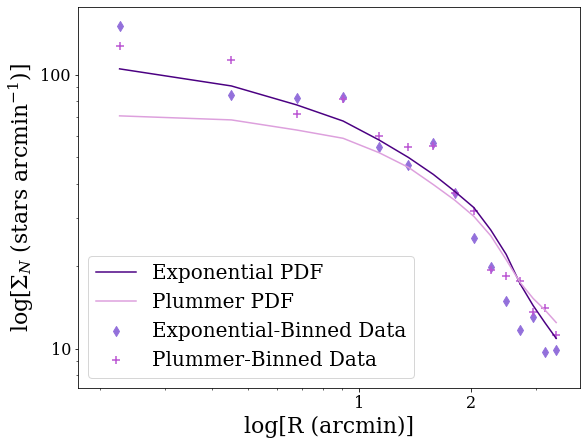

In [63]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(dist_e,model_p3e + bk*peg3e_bg_fit,label='Exponential PDF',
       color='indigo')
ax.plot(dist_p,model_p3p + bk*peg3p_bg_fit,label='Plummer PDF',
       color='plum')

# ax.errorbar(dist_e,data_1de + bk*peg3e_bg_fit,yerr=np.sqrt(data_1de + bk*peg3e_bg_fit),
#             label='Exponential Data',linestyle='')
ax.scatter(dist_e,data_1de + bk*peg3e_bg_fit,
            label='Exponential-Binned Data',marker='d',
           color='mediumpurple',s=50)

ax.scatter(dist_p,data_1dp + bk*peg3p_bg_fit,
            label='Plummer-Binned Data',marker='+',
           color='mediumorchid',s=50)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'log[$\Sigma_N$ (stars arcmin$^{-1}$)]',fontsize=22)
ax.set_xlabel(r'log[R (arcmin)]',fontsize=22)
# ax.set_title('Psc II',fontsize=20)

ax.set_xticks([1, 2])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.tick_params(axis='both', labelsize=16)

# ax.set_yticks([1e-1,1e1,1e+2])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.legend(fontsize=20)

# plt.savefig('peg3profile.png',bbox_inches='tight',dpi=660)
plt.show()